### **Menon Suraj Rajeev**

## **DS SEM 7**

## **Unit 2 Practical**

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d mahmoudreda55/satellite-image-classification

satellite-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref= zipfile.ZipFile('/content/satellite-image-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras import Sequential

import cv2
import os

## **Loading data**

In [89]:
classes = ['cloudy','desert','green_area','water']
dir = "/content/data"

img_shape =[224,224]

data = []

def loading_data():
  for category in classes:
    path  = os.path.join(dir,category)
    class_num = classes.index(category)
    i = 0
    for img in os.listdir(path):
      if i != 250 :
        img_array = cv2.imread(os.path.join(path,img))
        rgb_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        resize_array = cv2.resize(rgb_array,img_shape)
        data.append([resize_array,class_num])
        i = i+1
      else :
        continue

loading_data()


In [90]:
X = []
y = []
for img,cls in data:
  X.append(img)
  y.append(cls)

In [91]:
X = np.array(X).reshape(-1,224,224)
print(X.shape)

(3000, 224, 224)


In [92]:
X = X / 255.00
X = X.reshape(-1,224,224,3)
X.shape

(1000, 224, 224, 3)

In [93]:
print("Unique classes : ",np.unique(np.array(y)))
print('\n')
print("Count of classes : ")
pd.DataFrame(y).value_counts()

Unique classes :  [0 1 2 3]


Count of classes : 


0    250
1    250
2    250
3    250
dtype: int64

## **Splitting Training and validation data**

In [11]:
from sklearn.model_selection import train_test_split

X_train , X_val , y_train , y_val = train_test_split(X, y ,test_size= 0.2,random_state= 42,shuffle = True)
print('X train shape : ',X_train.shape)
print('y train shape : ',y_train.shape)
print('\n')
print('X test shape : ',X_val.shape)
print('y test shape : ',y_val.shape)

X train shape :  (800, 224, 224, 3)
y train shape :  (800, 4)


X test shape :  (200, 224, 224, 3)
y test shape :  (200, 4)


## **Custom Model**

In [12]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.layers import  Dropout
from keras.callbacks import EarlyStopping

In [18]:
#model

model= Sequential()

model.add(Conv2D(32,kernel_size=(3,3),strides=1,padding="same",activation="relu",input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),padding = "valid"))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),strides=1,padding="same",activation="relu",input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),padding = "valid"))
model.add(Dropout(0.3))

model.add(Conv2D(64,kernel_size=(3,3),strides=1,padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding = "valid"))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 56, 56, 32)       

In [20]:
early_stopping = EarlyStopping(monitor ='val_loss',min_delta =0.01,verbose =1 ,patience= 5)

In [21]:
model.compile(loss = "categorical_crossentropy", optimizer='adam',metrics = ['accuracy'])

In [22]:
history = model.fit(X_train,y_train,batch_size=32 ,epochs=30,validation_data=(X_val,y_val),
                    callbacks=[early_stopping])

Epoch 1/30
25/25 [==============================] - 5s 99ms/step - loss: 1.5626 - accuracy: 0.3425 - val_loss: 0.8572 - val_accuracy: 0.5000
Epoch 2/30
25/25 [==============================] - 2s 91ms/step - loss: 0.6713 - accuracy: 0.6338 - val_loss: 0.6345 - val_accuracy: 0.6000
Epoch 3/30
25/25 [==============================] - 2s 90ms/step - loss: 0.6631 - accuracy: 0.6438 - val_loss: 0.7396 - val_accuracy: 0.6550
Epoch 4/30
25/25 [==============================] - 2s 82ms/step - loss: 0.5844 - accuracy: 0.6837 - val_loss: 0.6733 - val_accuracy: 0.6150
Epoch 5/30
25/25 [==============================] - 2s 77ms/step - loss: 0.5679 - accuracy: 0.6925 - val_loss: 0.6535 - val_accuracy: 0.7250
Epoch 6/30
25/25 [==============================] - 2s 78ms/step - loss: 0.5285 - accuracy: 0.7163 - val_loss: 0.6247 - val_accuracy: 0.6900
Epoch 7/30
25/25 [==============================] - 2s 77ms/step - loss: 0.5136 - accuracy: 0.7575 - val_loss: 0.6757 - val_accuracy: 0.6100
Epoch 7: earl

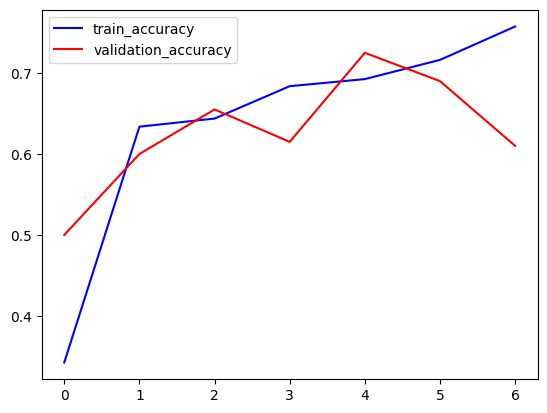

In [23]:
plt.plot(history.history['accuracy'],color='blue',label='train_accuracy')
plt.plot(history.history['val_accuracy'],color='red',label='validation_accuracy')
plt.legend()
plt.show()

## **Below one is actually loss not accuracy**

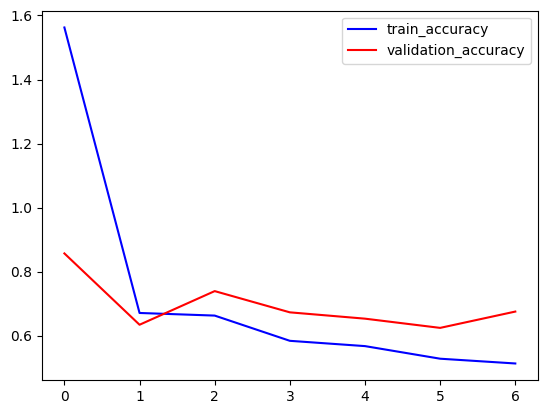

In [24]:
plt.plot(history.history['loss'],color='blue',label='train_loss')
plt.plot(history.history['val_loss'],color='red',label='validation_loss')
plt.legend()
plt.show()

## **Pretrained Model**

In [28]:
from keras.applications.vgg16 import VGG16

In [29]:
conv_base = VGG16(weights = 'imagenet' , include_top=False , input_shape = (224,224,3))

In [30]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 256)               6422784   
                                                                 
 dense_6 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,138,500
Trainable params: 21,138,500
Non-trainable params: 0
_________________________________________________________________


In [32]:
conv_base.trainable = False

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 256)               6422784   
                                                                 
 dense_6 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_________________________________________________________________


In [34]:
early_stopping = EarlyStopping(monitor ='val_loss',min_delta =0.001,verbose =1 ,patience= 5)

In [35]:
model.compile(loss = "categorical_crossentropy", optimizer='adam',metrics = ['accuracy'])

In [36]:
history = model.fit(X_train,y_train,batch_size=32 ,epochs=30,validation_data=(X_val,y_val),
                    callbacks=[early_stopping])

Epoch 1/30
25/25 [==============================] - 11s 229ms/step - loss: 2.1961 - accuracy: 0.3113 - val_loss: 1.2588 - val_accuracy: 0.4050
Epoch 2/30
25/25 [==============================] - 4s 175ms/step - loss: 1.1099 - accuracy: 0.4800 - val_loss: 1.0444 - val_accuracy: 0.4650
Epoch 3/30
25/25 [==============================] - 4s 178ms/step - loss: 0.9161 - accuracy: 0.6200 - val_loss: 0.8536 - val_accuracy: 0.6750
Epoch 4/30
25/25 [==============================] - 4s 153ms/step - loss: 0.7680 - accuracy: 0.6525 - val_loss: 0.7052 - val_accuracy: 0.8300
Epoch 5/30
25/25 [==============================] - 4s 154ms/step - loss: 0.6308 - accuracy: 0.7775 - val_loss: 0.6082 - val_accuracy: 0.8550
Epoch 6/30
25/25 [==============================] - 4s 180ms/step - loss: 0.5560 - accuracy: 0.7862 - val_loss: 0.5407 - val_accuracy: 0.9000
Epoch 7/30
25/25 [==============================] - 4s 155ms/step - loss: 0.4958 - accuracy: 0.8150 - val_loss: 0.5208 - val_accuracy: 0.7550
Epoch

## **Model evaluation**

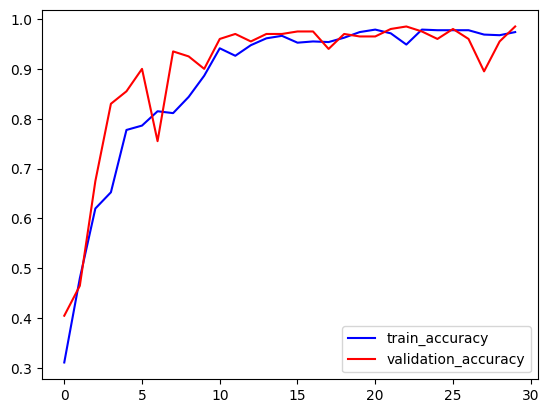

In [37]:
plt.plot(history.history['accuracy'],color='blue',label='train_accuracy')
plt.plot(history.history['val_accuracy'],color='red',label='validation_accuracy')
plt.legend()
plt.show()

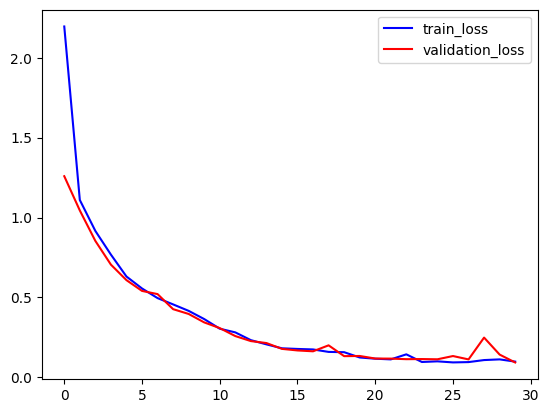

In [39]:
plt.plot(history.history['loss'],color='blue',label='train_loss')
plt.plot(history.history['val_loss'],color='red',label='validation_loss')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import classification_report

classes = sorted(os.listdir(dir))

predict = model.predict(X_val)
pred_classes = np.argmax(predict,axis=1)

true_classes = np.argmax(y_val,axis=1)

print(classification_report(true_classes, pred_classes , target_names= classes))

7/7 [==============================] - 1s 124ms/step
              precision    recall  f1-score   support

      cloudy       1.00      0.98      0.99        44
      desert       1.00      1.00      1.00        52
  green_area       0.98      0.96      0.97        55
       water       0.96      1.00      0.98        49

    accuracy                           0.98       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.98      0.99       200



In [41]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(true_classes,pred_classes) ,
             index = ['true_cloudy','true_desert','true_green_area','true_water'],
             columns = ['pred_cloudy','pred_desert','pred_green_area','pred_water'])

,pred_cloudy,pred_desert,pred_green_area,pred_water
true_cloudy,43,0,1,0
true_desert,0,52,0,0
true_green_area,0,0,53,2
true_water,0,0,0,49


## **Prediction**

In [83]:
img_shape = [224,224]


def pred(path):

  img_array = cv2.imread(path)
  rgb_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
  resize_array = cv2.resize(rgb_array,img_shape)
  img_array = np.array(resize_array).reshape(-1,224,224)
  img_array = img_array / 255.00
  img_array = img_array.reshape(-1,224,224,3)

  predict = model.predict(img_array)
  label = np.argmax(predict,axis=1)
  prob = str(predict[0,label]*100) +'%'

  if label==0:
        ans = "Cloudy"
  elif label==1:
        ans= "Desert"
  elif label==2:
        ans= "Green Area"
  else:
        ans = "Water"

  return ans,prob



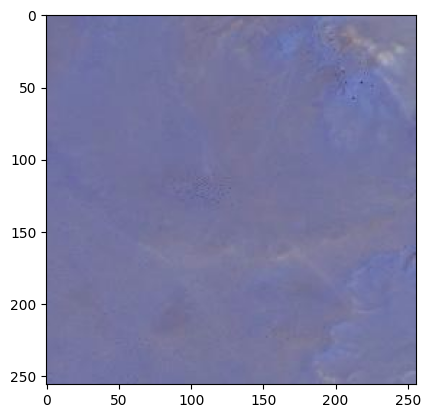

In [62]:
path = "/content/data/desert/desert(1).jpg"
plt.imshow(cv2.imread(path))

In [84]:
pred(path)

1/1 [==============================] - 0s 21ms/step


('Desert', '[96.83078]%')